In [155]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [156]:
df = pd.read_csv('https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv')

df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Exhaustive feature Selection

In [157]:
lr = LogisticRegression()

sel = EFS(lr, max_features=4, scoring='accuracy', cv=5)

In [158]:
model = sel.fit(df.iloc[:, :4], df['species'])

C:\Users\ACER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
Features: 15/15

In [159]:
model.best_score_

0.9733333333333334

In [160]:
model.best_feature_names_

('sepal_length', 'sepal_width', 'petal_length', 'petal_width')

In [161]:
# Detailed Output

model.subsets_

{0: {'feature_idx': (0,),
  'cv_scores': array([0.66666667, 0.73333333, 0.76666667, 0.76666667, 0.83333333]),
  'avg_score': 0.7533333333333333,
  'feature_names': ('sepal_length',)},
 1: {'feature_idx': (1,),
  'cv_scores': array([0.53333333, 0.56666667, 0.53333333, 0.53333333, 0.63333333]),
  'avg_score': 0.5599999999999999,
  'feature_names': ('sepal_width',)},
 2: {'feature_idx': (2,),
  'cv_scores': array([0.93333333, 1.        , 0.9       , 0.93333333, 1.        ]),
  'avg_score': 0.9533333333333334,
  'feature_names': ('petal_length',)},
 3: {'feature_idx': (3,),
  'cv_scores': array([1.        , 0.96666667, 0.9       , 0.93333333, 1.        ]),
  'avg_score': 0.96,
  'feature_names': ('petal_width',)},
 4: {'feature_idx': (0, 1),
  'cv_scores': array([0.73333333, 0.83333333, 0.76666667, 0.86666667, 0.9       ]),
  'avg_score': 0.8200000000000001,
  'feature_names': ('sepal_length', 'sepal_width')},
 5: {'feature_idx': (0, 2),
  'cv_scores': array([0.93333333, 1.        , 0.9   

In [162]:
metric_df = pd.DataFrame.from_dict(model.get_metric_dict()).T
metric_df

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
0,"(0,)","[0.6666666666666666, 0.7333333333333333, 0.766...",0.753333,"(sepal_length,)",0.069612,0.05416,0.02708
1,"(1,)","[0.5333333333333333, 0.5666666666666667, 0.533...",0.56,"(sepal_width,)",0.049963,0.038873,0.019437
2,"(2,)","[0.9333333333333333, 1.0, 0.9, 0.9333333333333...",0.953333,"(petal_length,)",0.051412,0.04,0.02
3,"(3,)","[1.0, 0.9666666666666667, 0.9, 0.9333333333333...",0.96,"(petal_width,)",0.049963,0.038873,0.019437
4,"(0, 1)","[0.7333333333333333, 0.8333333333333334, 0.766...",0.82,"(sepal_length, sepal_width)",0.079462,0.061824,0.030912
5,"(0, 2)","[0.9333333333333333, 1.0, 0.9, 0.9333333333333...",0.953333,"(sepal_length, petal_length)",0.051412,0.04,0.02
6,"(0, 3)","[0.9333333333333333, 0.9666666666666667, 0.933...",0.953333,"(sepal_length, petal_width)",0.034274,0.026667,0.013333
7,"(1, 2)","[0.9333333333333333, 1.0, 0.9, 0.9333333333333...",0.953333,"(sepal_width, petal_length)",0.051412,0.04,0.02
8,"(1, 3)","[0.9333333333333333, 0.9666666666666667, 0.9, ...",0.94,"(sepal_width, petal_width)",0.032061,0.024944,0.012472
9,"(2, 3)","[0.9666666666666667, 0.9666666666666667, 0.933...",0.96,"(petal_length, petal_width)",0.032061,0.024944,0.012472


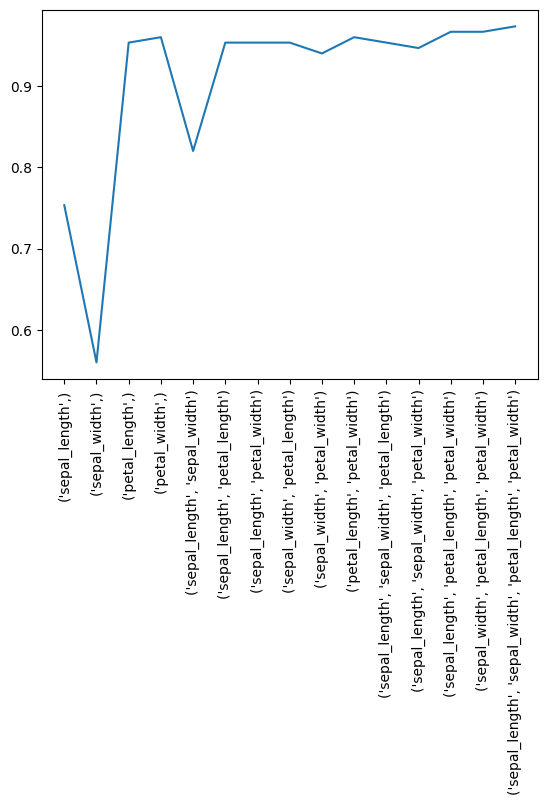

In [163]:
plt.plot([str(k) for k in metric_df['feature_names']], metric_df['avg_score'])
plt.xticks(rotation=90)
plt.show()

### Regression Example

In [164]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv')

df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [165]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, :-1], df['medv'], test_size=0.2, random_state=42)

In [166]:
print(X_train.shape)
print(X_test.shape)

(404, 13)
(102, 13)


In [167]:
X_train.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
477,15.02340,0.0,18.10,0,0.6140,5.304,97.3,2.1007,24,666,20.2,349.48,24.91
15,0.62739,0.0,8.14,0,0.5380,5.834,56.5,4.4986,4,307,21.0,395.62,8.47
332,0.03466,35.0,6.06,0,0.4379,6.031,23.3,6.6407,1,304,16.9,362.25,7.83
423,7.05042,0.0,18.10,0,0.6140,6.103,85.1,2.0218,24,666,20.2,2.52,23.29
19,0.72580,0.0,8.14,0,0.5380,5.727,69.5,3.7965,4,307,21.0,390.95,11.28


In [168]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [169]:
# Baseline Model

model = LinearRegression()

print("Training", np.mean(cross_val_score(model, X_train, y_train, cv=5, scoring='r2')))
print("Testing", np.mean(cross_val_score(model, X_test, y_test, cv=5, scoring='r2')))

Training 0.724435734224026
Testing 0.5451790940964925


In [ ]:
lr = LinearRegression()

exh = EFS(lr, max_features=13, scoring='r2', cv=10, print_progress=True, n_jobs=-1)

sel = exh.fit(X_train, y_train)

In [ ]:
sel.best_score_

0.7021432332186084

In [ ]:
sel.best_feature_names_

('0', '3', '4', '5', '7', '8', '9', '10', '11', '12')

In [ ]:
metric_df = pd.DataFrame.from_dict(sel.get_metric_dict()).T

metric_df

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
0,"(0,)","[0.06187201349312821, 0.21695752952290703, 0.1...",0.1113,"(0,)",0.068626,0.092399,0.0308
1,"(1,)","[-0.06909411223332595, 0.06378364489046917, 0....",0.080141,"(1,)",0.043549,0.058635,0.019545
2,"(2,)","[0.2581400495130045, 0.24192652096087108, 0.15...",0.197438,"(2,)",0.056161,0.075616,0.025205
3,"(3,)","[-0.06519180407233627, -0.11570770910402528, 0...",0.002908,"(3,)",0.057893,0.077949,0.025983
4,"(4,)","[0.18831320204786572, 0.15611671149828166, 0.1...",0.15303,"(4,)",0.053874,0.072536,0.024179
...,...,...,...,...,...,...,...
8186,"(0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12)","[0.7903768760758775, 0.7978748201943937, 0.742...",0.698955,"(0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12)",0.110196,0.14837,0.049457
8187,"(0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)","[0.7793809319729096, 0.7920049721169651, 0.753...",0.699647,"(0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)",0.115985,0.156164,0.052055
8188,"(0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)","[0.7802485152933576, 0.8031632921683025, 0.754...",0.698545,"(0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)",0.117601,0.15834,0.05278
8189,"(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)","[0.7851529306013899, 0.7726604948432467, 0.749...",0.69279,"(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)",0.116607,0.157001,0.052334


In [ ]:
def adjusted_r2(r2, num_examples, num_features):
    coef = (num_examples - 1) / (num_examples - num_features - 1)
    return 1 - (1 - r2) * coef

In [ ]:
metric_df['observations'] = 404
metric_df['num_features'] = metric_df['feature_idx'].apply(lambda x:len(x))
metric_df['adjusted_r2'] = adjusted_r2(metric_df['avg_score'], metric_df['observations'], metric_df['num_features'])

In [ ]:
metric_df.sort_values('adjusted_r2', ascending=False)

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err,observations,num_features,adjusted_r2
7590,"(0, 4, 5, 7, 8, 9, 10, 11, 12)","[0.7948781300135748, 0.8126032997049035, 0.740...",0.701604,"(0, 4, 5, 7, 8, 9, 10, 11, 12)",0.109782,0.147812,0.049271,404,9,0.694787
8029,"(0, 3, 4, 5, 7, 8, 9, 10, 11, 12)","[0.7853673828678086, 0.8068527620446221, 0.753...",0.702143,"(0, 3, 4, 5, 7, 8, 9, 10, 11, 12)",0.115758,0.155859,0.051953,404,10,0.694564
7975,"(0, 1, 4, 5, 7, 8, 9, 10, 11, 12)","[0.7916866437250346, 0.8002117305356403, 0.740...",0.701376,"(0, 1, 4, 5, 7, 8, 9, 10, 11, 12)",0.108014,0.145431,0.048477,404,10,0.693777
8150,"(0, 1, 3, 4, 5, 7, 8, 9, 10, 11, 12)","[0.7824493530648429, 0.7949109285480953, 0.753...",0.702035,"(0, 1, 3, 4, 5, 7, 8, 9, 10, 11, 12)",0.114302,0.153898,0.051299,404,11,0.693673
7566,"(0, 3, 4, 5, 7, 8, 10, 11, 12)","[0.7682279280336335, 0.8030267188370753, 0.762...",0.700389,"(0, 3, 4, 5, 7, 8, 10, 11, 12)",0.119573,0.160996,0.053665,404,9,0.693545
...,...,...,...,...,...,...,...,...,...,...
1,"(1,)","[-0.06909411223332595, 0.06378364489046917, 0....",0.080141,"(1,)",0.043549,0.058635,0.019545,404,1,0.077853
30,"(1, 7)","[-0.06763615312808446, 0.06933915753701958, 0....",0.077769,"(1, 7)",0.043101,0.058032,0.019344,404,2,0.07317
49,"(3, 7)","[-0.050810320515409346, -0.042849300889358455,...",0.065037,"(3, 7)",0.066554,0.089609,0.02987,404,2,0.060374
7,"(7,)","[-0.020714728360076817, 0.06907241897075367, 0...",0.036859,"(7,)",0.036497,0.04914,0.01638,404,1,0.034463


In [ ]:
X_train_sel = sel.transform(X_train)
X_test_sel = sel.transform(X_test)

In [ ]:
model = LinearRegression()

print("Training", np.mean(cross_val_score(model, X_train_sel, y_train, cv=5, scoring='r2')))
print("Testing", np.mean(cross_val_score(model, X_test_sel, y_test, cv=5, scoring='r2')))

Training 0.7261221606129598
Testing 0.5246730606335532
